# EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('failed_experiments.csv')

In [3]:
def parse_edges(edge_str):
    if pd.isna(edge_str) or edge_str == '[]':
        return []
    try:
        return ast.literal_eval(edge_str)
    except:
        return []

df['missing_edges'] = df['missing_edges'].apply(parse_edges)
df['extra_edges'] = df['extra_edges'].apply(parse_edges)

In [5]:
df['num_missing'] = df['missing_edges'].apply(len)
df['num_extra'] = df['extra_edges'].apply(len)

In [6]:
total_experiments = len(df)
avg_missing = df['num_missing'].mean()
avg_extra = df['num_extra'].mean()
max_missing = df['num_missing'].max()
max_extra = df['num_extra'].max()

In [9]:
only_missing = sum((df['num_missing'] > 0) & (df['num_extra'] == 0))
only_extra = sum((df['num_missing'] == 0) & (df['num_extra'] > 0))
both_errors = sum((df['num_missing'] > 0) & (df['num_extra'] > 0))

In [11]:
all_missing = [edge for edges in df['missing_edges'] for edge in edges]
all_extra = [edge for edges in df['extra_edges'] for edge in edges]

missing_counts = Counter(all_missing)
extra_counts = Counter(all_extra)

In [12]:
print(f"Total experiments analyzed: {total_experiments}")
print(f"\nError distribution:")
print(f"Experiments with only missing edges: {only_missing} ({only_missing/total_experiments*100:.2f}%)")
print(f"Experiments with only extra edges: {only_extra} ({only_extra/total_experiments*100:.2f}%)")
print(f"Experiments with both missing and extra edges: {both_errors} ({both_errors/total_experiments*100:.2f}%)")

print(f"\nEdge statistics:")
print(f"Average missing edges per experiment: {avg_missing:.2f}")
print(f"Average extra edges per experiment: {avg_extra:.2f}")
print(f"Maximum missing edges in an experiment: {max_missing}")
print(f"Maximum extra edges in an experiment: {max_extra}")

print(f"\nTop 5 most commonly missing edges: {missing_counts.most_common(5)}")
print(f"Top 5 most commonly extra edges: {extra_counts.most_common(5)}")


Total experiments analyzed: 133

Error distribution:
Experiments with only missing edges: 65 (48.87%)
Experiments with only extra edges: 42 (31.58%)
Experiments with both missing and extra edges: 26 (19.55%)

Edge statistics:
Average missing edges per experiment: 0.93
Average extra edges per experiment: 0.78
Maximum missing edges in an experiment: 7
Maximum extra edges in an experiment: 9

Top 5 most commonly missing edges: [(('D', 'E'), 30), (('C', 'D'), 29), (('B', 'D'), 16), (('A', 'E'), 12), (('A', 'D'), 10)]
Top 5 most commonly extra edges: [(('B', 'E'), 19), (('A', 'C'), 18), (('A', 'D'), 12), (('B', 'D'), 11), (('C', 'E'), 11)]


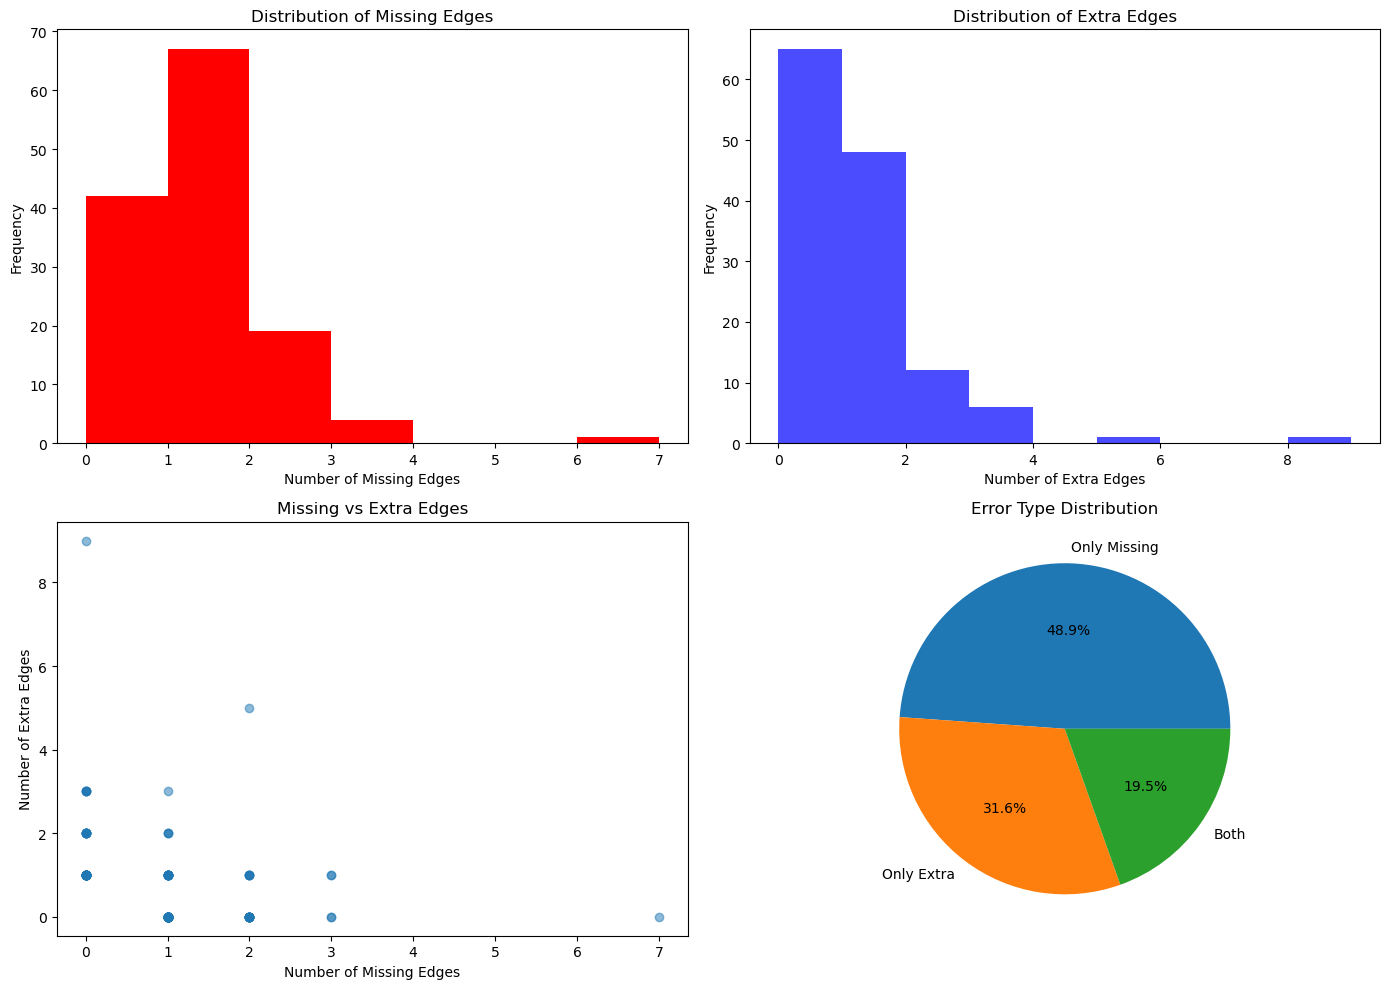


Correlation between number of missing and extra edges: -0.342


In [17]:
# Plot distributions
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(df['num_missing'], bins=max(max_missing, 10), alpha=0.7, color='red')
plt.title('Distribution of Missing Edges')
plt.xlabel('Number of Missing Edges')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['num_extra'], bins=max(max_extra, 10), alpha=0.7, color='blue')
plt.title('Distribution of Extra Edges')
plt.xlabel('Number of Extra Edges')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.scatter(df['num_missing'], df['num_extra'], alpha=0.5)
plt.title('Missing vs Extra Edges')
plt.xlabel('Number of Missing Edges')
plt.ylabel('Number of Extra Edges')

plt.subplot(2, 2, 4)
labels = ['Only Missing', 'Only Extra', 'Both']
sizes = [only_missing, only_extra, both_errors]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Error Type Distribution')

plt.tight_layout()
plt.savefig('edge_error_analysis.png')
plt.show()

# Correlation between number of missing and extra edges
correlation = df['num_missing'].corr(df['num_extra'])
print(f"\nCorrelation between number of missing and extra edges: {correlation:.3f}")

# Extracting premise into dataset

In [68]:
df = pd.read_csv('failed_experiments.csv')

In [69]:
df = df.drop([31, 33, 44, 58], axis=0)
print(len(df))

129


In [29]:
def extract_premise(input_prompt):
    # Find the last occurrence of "Premise:" in the text
    premise_start = input_prompt.rfind("Premise:")

    # Find the "Answer:" that follows the last "Premise:"
    answer_start = input_prompt.find("Answer:", premise_start)

    # Extract the text between "Premise:" and "Answer:"
    premise_text = input_prompt[premise_start + len("Premise:"):answer_start].strip()

    return premise_text

In [70]:
df['premise'] = df['input_prompt'].apply(extract_premise)
df.to_csv('failed_experiments_premise.csv', index=False)